In [1]:
import pandas as pd
import numpy as np

In [2]:
adoption = pd.read_csv("./adoptions.csv")
doggos = pd.read_csv("./doginfo.csv")
people = pd.read_csv("./personinfo.csv")
currentd = pd.read_csv("./currentdogs.csv") #dogs on waiting list
currentp = pd.read_csv("./currentpeople.csv") #people on waiting list

In [8]:
doggos.head()

,id,size,vocal,walktime,shed,strength,drool,affection,intelligence,social,age,percentgooddog
0,1,77.0,23.0,25.0,25.0,47.0,1.9,74.0,42.0,43.0,14.0,150
1,2,66.0,17.0,35.0,18.0,53.0,1.1,81.0,65.0,93.0,10.0,150
2,3,32.0,14.0,75.0,59.0,70.0,1.1,61.0,76.0,76.0,3.0,150
3,4,14.0,85.0,15.0,61.0,14.0,0.4,17.0,20.0,9.0,NaN,150
4,5,91.0,44.0,80.0,84.0,80.0,4.1,NaN,53.0,52.0,8.0,150


In [9]:
doggos.describe()

,id,size,vocal,walktime,shed,strength,drool,affection,intelligence,social,age,percentgooddog
count,1000.000000,990.000000,970.000000,991.000000,971.000000,982.000000,990.000000,949.000000,991.000000,976.000000,979.000000,1000.0
mean,500.500000,66.837374,43.240206,54.687185,42.901133,61.289206,1.944040,63.406744,49.648840,59.945697,10.016343,150.0
std,288.819436,62.805772,58.064402,80.144144,27.088753,48.599655,1.249954,21.968212,18.087101,20.918355,3.334418,0.0
min,1.000000,13.000000,3.000000,15.000000,3.000000,12.000000,0.300000,10.000000,5.000000,9.000000,0.000000,150.0
25%,250.750000,43.000000,19.000000,20.000000,16.000000,46.000000,1.000000,53.000000,40.000000,47.000000,7.000000,150.0
50%,500.500000,62.000000,33.000000,40.000000,45.000000,55.000000,1.600000,68.000000,50.000000,58.000000,10.000000,150.0
75%,750.250000,79.000000,56.000000,65.000000,68.000000,75.000000,2.800000,79.000000,58.000000,79.000000,13.000000,150.0
max,1000.000000,1080.000000,996.000000,900.000000,97.000000,648.000000,5.300000,161.000000,92.000000,96.000000,17.000000,150.0


In [23]:
doggos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
id                1000 non-null int64
size              990 non-null float64
vocal             970 non-null float64
walktime          991 non-null float64
shed              971 non-null float64
strength          982 non-null float64
drool             990 non-null float64
affection         949 non-null float64
intelligence      991 non-null float64
social            976 non-null float64
age               979 non-null float64
percentgooddog    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [5]:
doggos.drop(columns=["percentgooddog"], inplace = True)

In [6]:
#replacing outliers with mean values 
doggos["size"] = np.where((doggos["size"] > 120), np.nan, doggos["size"])
doggos["size"].fillna(doggos["size"].mean(), inplace=True)

doggos["vocal"] = np.where((doggos["vocal"] > 100), np.nan, doggos["vocal"])
doggos["vocal"].fillna(doggos["vocal"].mean(), inplace=True)

doggos["walktime"] = np.where((doggos["walktime"] > 120), np.nan, doggos["walktime"])
doggos["walktime"].fillna(doggos["walktime"].mean(), inplace=True)

doggos["strength"] = np.where((doggos["strength"] > 100), np.nan, doggos["strength"])
doggos["strength"].fillna(doggos["strength"].mean(), inplace=True)

doggos["affection"] = np.where((doggos["affection"] > 100), np.nan, doggos["affection"])
doggos["affection"].fillna(doggos["affection"].mean(), inplace=True)

In [7]:
#replaces remaining NaN values with average in column 
doggos = doggos.apply(lambda x: x.fillna(x.mean()))

In [8]:
#people infos
people.describe()

,id,age,npeople,activity,bedrooms,gardensize
count,1000.000000,979.000000,982.000000,970.000000,972.000000,972.000000
mean,549.560000,50.275792,2.522403,149.613402,3.066872,12.705761
std,318.272572,20.573712,1.784235,792.101052,1.194156,4.920150
min,1.000000,20.000000,1.000000,25.000000,1.000000,4.500000
25%,271.750000,33.000000,2.000000,50.000000,2.000000,9.000000
50%,552.500000,46.000000,2.000000,65.000000,3.000000,11.000000
75%,824.250000,68.000000,3.000000,85.000000,4.000000,14.500000
max,1100.000000,158.000000,20.000000,11000.000000,7.000000,31.000000


In [3]:
#replacing outliers with mean value
people["age"] = np.where((people["age"] > 85), np.nan, people["age"])
people["age"].fillna(people["age"].mean(), inplace=True)

people["npeople"] = np.where((people["npeople"] > 6), np.nan, people["npeople"])
people["npeople"].fillna(people["npeople"].median(), inplace=True)

people["activity"] = np.where((people["activity"] > 2000), np.nan, people["activity"])
people["activity"].fillna(people["activity"].mean(), inplace=True)

In [4]:
people = pd.get_dummies(people, columns=["work"])

In [5]:
#replaces remaining NaN values with average in column 
people = people.apply(lambda x: x.fillna(x.mean()))

In [6]:
people.describe()

,id,age,npeople,activity,bedrooms,gardensize,work_full time,work_part time,work_unemployed/retired
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,549.560000,48.873431,2.316000,68.430657,3.066872,12.705761,0.361000,0.248000,0.380000
std,318.272572,18.013611,0.964922,21.124853,1.177302,4.850709,0.480531,0.432068,0.485629
min,1.000000,20.000000,1.000000,25.000000,1.000000,4.500000,0.000000,0.000000,0.000000
25%,271.750000,33.000000,2.000000,50.000000,2.000000,9.000000,0.000000,0.000000,0.000000
50%,552.500000,46.000000,2.000000,65.000000,3.000000,11.250000,0.000000,0.000000,0.000000
75%,824.250000,66.000000,3.000000,85.000000,4.000000,14.500000,1.000000,0.000000,1.000000
max,1100.000000,85.000000,5.000000,130.000000,7.000000,31.000000,1.000000,1.000000,1.000000


In [50]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [51]:
#cluster time

#import scikit 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

from kmodes.kprototypes import KPrototypes
import warnings
warnings.filterwarnings("ignore")

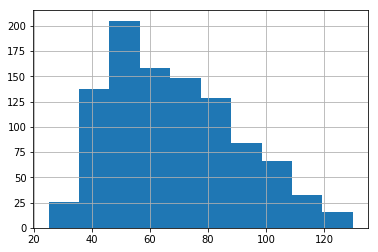

In [9]:
people.activity.hist()

In [ ]:
data = people.iloc[:,1:]
data


In [14]:
data['activity_log'] = np.log(data['activity'])
preclust_data = data.drop(columns=['activity'])
preclust_data.head()

,age,npeople,bedrooms,gardensize,work_full time,work_part time,work_unemployed/retired,activity_log
0,21.0,2.0,2.0,11.0,1,0,0,4.499810
1,28.0,2.0,2.0,10.0,1,0,0,4.787492
2,26.0,2.0,2.0,11.0,1,0,0,4.653960
3,23.0,2.0,2.0,8.0,1,0,0,4.744932
4,53.0,3.0,5.0,17.5,0,1,0,4.605170


In [46]:
#normalise the data 
preclust_data.apply(lambda x: (x - x.mean()) / np.std(x))

,age,npeople,bedrooms,gardensize,work_full time,work_part time,work_unemployed/retired,activity_log
0,-1.548128e+00,-0.327651,-0.906655,-3.518279e-01,1.330445,-0.574271,-0.782881,1.035141
1,-1.159339e+00,-0.327651,-0.906655,-5.580865e-01,1.330445,-0.574271,-0.782881,1.961022
2,-1.270421e+00,-0.327651,-0.906655,-3.518279e-01,1.330445,-0.574271,-0.782881,1.531262
3,-1.437045e+00,-0.327651,-0.906655,-9.706037e-01,1.330445,-0.574271,-0.782881,1.824048
4,2.291952e-01,0.709220,1.642820,9.888529e-01,-0.751628,1.741338,-0.782881,1.374235
5,1.117857e+00,0.709220,1.642820,1.813887e+00,-0.751628,1.741338,-0.782881,-0.012205
6,6.257117e-02,-0.327651,1.642820,2.669478e-01,-0.751628,1.741338,-0.782881,-1.574772
7,-6.594665e-01,1.746091,0.792995,-1.073733e+00,1.330445,-0.574271,-0.782881,-0.012205
8,1.340022e+00,-0.327651,-0.056830,-6.612158e-01,-0.751628,-0.574271,1.277333,-1.574772
9,1.395564e+00,-1.364523,-0.906655,-6.612158e-01,-0.751628,-0.574271,1.277333,-0.856603


In [47]:
# Converting the dataset into matrix
preclust_data = preclust_data.as_matrix()

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [52]:
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(preclust_data, categorical=[1,2,4,5,6])

In [53]:
kproto.cost_

37338.66384903287

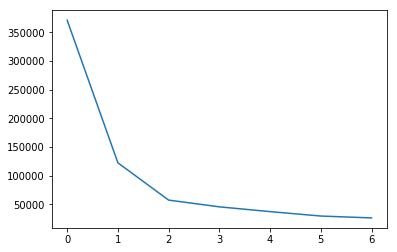

In [55]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(preclust_data, categorical=[1,2,4,5,6])
    cost.append(kproto.cost_)
    
plt.plot(cost)

In [61]:
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(preclust_data, categorical=[1,2,4,5,6])

In [62]:
data['cluster_id'] = clusters

In [63]:
# Checking the clusters created
peepcluster = pd.DataFrame(data['cluster_id'].value_counts())
peepcluster

,cluster_id
2,370
1,336
0,294


In [69]:
grouped = data.groupby(['cluster_id'])


In [70]:
grouped.agg({'age': 'mean',
        'activity': 'mean',
    'npeople': 'median',
    'work_full time' :'sum',
    'work_part time' : 'sum',
    'work_unemployed/retired' : 'sum'
  }).round(1)

,age,activity,npeople,work_full time,work_part time,work_unemployed/retired
cluster_id,,,,,,
0,72.6,49.3,1.0,0,3,283.0
1,29.1,82.1,2.0,254,81,1.0
2,48.0,71.2,2.0,107,164,96.0


In [21]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

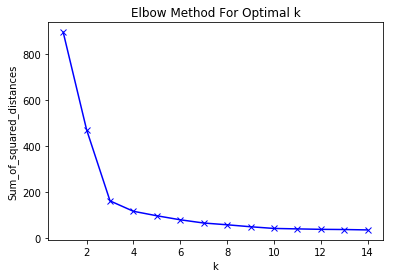

In [22]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [42]:
#trying 3 clusters 
kmeans = KMeans(n_clusters=7) 
kmeans.fit(data_transformed)

cluster_labels = kmeans.labels_

In [43]:
people_k3 = people.assign(Cluster=cluster_labels)

In [44]:
grouped = people_k3.groupby(['Cluster'])
grouped.size()


Cluster
0    318
1     99
2     79
3     73
4     84
5    178
6    169
dtype: int64

In [45]:
grouped.agg({
    'age': 'mean',
    'activity': 'mean',
    'npeople': 'median',
    'work_full time' :'sum',
    'work_part time' : 'sum',
    'work_unemployed/retired' : 'sum'
  }).round(1)

,age,activity,npeople,work_full time,work_part time,work_unemployed/retired
Cluster,,,,,,
0,70.8,48.6,1.0,0,0,310.0
1,44.8,60.0,2.0,99,0,0.0
2,34.5,73.5,4.0,0,79,0.0
3,52.3,90.7,3.0,0,0,70.0
4,33.9,70.7,4.0,84,0,0.0
5,25.8,90.9,2.0,178,0,0.0
6,47.0,73.9,2.0,0,169,0.0


In [ ]:
#trying 3 clusters 
kmeans = KMeans(n_clusters=4) 
kmeans.fit(data_transformed)

cluster_labels = kmeans.labels_